In [2]:
import matplotlib.pyplot as plt

In [3]:
x=[i for i in range(10)]
y =[2,4,3,4,6,10,9,11,14,18]

In [4]:
n=len(x)
n

10

In [23]:
sum_xy=sum([i*j for i,j in zip(x,y)])
sum_xy

501

In [26]:
sum_x=sum(x)
sum_x

45

In [27]:
sum_y=sum(y)
sum_y

81

In [28]:
sum_xx=sum([i**2 for i in (x)])
sum_xx

285

In [19]:
sum_xx=sum([i**2 for i in (x)])
sum_xx

285

In [29]:
m=(n*sum_xy-sum_x*sum_y)/(n*sum_xx-sum_x**2)
m

1.6545454545454545

In [31]:
c=(sum_y-m*sum_x)/n
c

0.6545454545454547

Enter value for m :1.6545454545454545
Enter value for c :0.6545454545454547


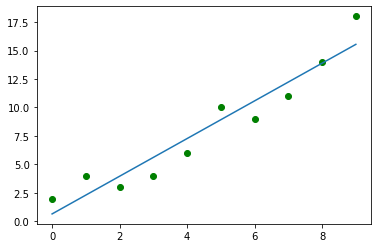

In [2]:
import matplotlib.pyplot as plt

x =[i for i in range(10)]
y =[2,4,3,4,6,10,9,11,14,18]

m=float(input('Enter value for m :'))
c=float(input('Enter value for c :'))
a=m*0+c
b=m*9+c

plt.scatter(x, y, c='green')
plt.plot([0,9],[a,b])

plt.show()


In [4]:
pred=m*float(input('enter the value for x'))+c
pred

enter the value for x1


2.309090909090909

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data=pd.read_csv('./fish.csv')
df=data.copy()
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
137,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
130,Pike,300.0,32.7,35.0,38.8,5.9364,4.3844
32,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
48,Roach,169.0,22.0,24.0,27.2,7.5344,3.8352
119,Perch,850.0,36.9,40.0,42.3,11.9286,7.1064
148,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
106,Perch,250.0,25.9,28.0,29.4,7.8204,4.2042
91,Perch,130.0,20.5,22.5,24.0,5.8560,3.6240
29,Bream,1000.0,33.5,37.0,42.6,18.9570,6.6030
146,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772


In [10]:
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
df.head()


,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
Species      156 non-null object
Weight       156 non-null float64
LengthVer    156 non-null float64
LengthDia    156 non-null float64
LengthCro    156 non-null float64
Height       156 non-null float64
Width        156 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.7+ KB


In [13]:
print(str('NaN value in the dataset: '), df.isnull().values.any())

NaN value in the dataset:  False


In [14]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp

,Species
Perch,56
Bream,35
Roach,20
Pike,14
Smelt,14
Parkki,11
Whitefish,6


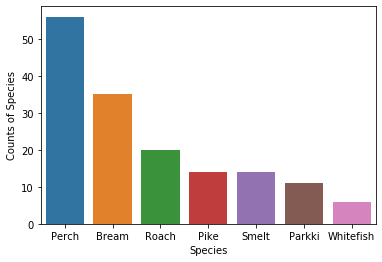

In [21]:
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

In [16]:
y = df['Weight']
X = df.iloc[:,2:7]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)print('X_train: ', np.shape(X_train))


SyntaxError: invalid syntax (<ipython-input-22-d3911807858a>, line 2)

In [23]:
y = df['Weight']
X = df.iloc[:,2:7]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [29]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -494.44085721886285
Model coefficients:  [ 62.41527657  -7.41179795 -31.06023916  26.90956775  42.23999841]


In [32]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -494.44 + 62.42*X1 -7.41*X2 -31.06*X3 + 26.91*X4 + 42.24*X5


In [34]:
y = -494.44 + 62.42*float(input('x1:'))-7.41*float(input('x2:')) -31.06*float(input('x3:')) + 26.91*float(input('x4:')) + 42.24*float(input('x5:'))

x1:2.6
x2:3.4
x3:5.5
x4:6.6
x5:7.7


In [35]:
y

-25.317999999999984

In [37]:
y_head=reg.predict(X_train)

In [38]:
r2_score(y_train,y_head)

0.8888919014691643

In [39]:
y_pred=reg.predict(X_test)

In [40]:
print(r2_score(y_test, y_pred))

0.8542092608109684


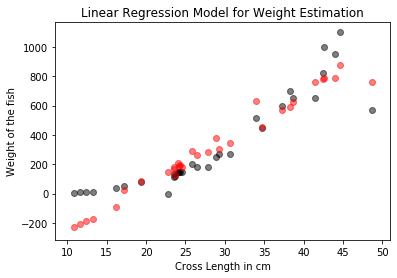

In [54]:
plt.scatter(X_test['LengthCro'], y_test, color='black', alpha=0.5)
plt.scatter(X_test['LengthCro'], y_pred, color='red', alpha=0.5)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

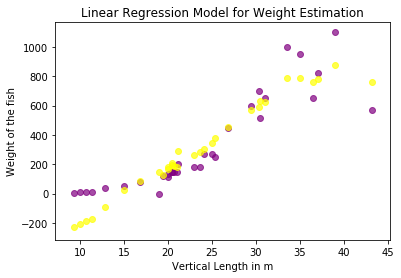

In [63]:
plt.scatter(X_test['LengthVer'], y_test, color='purple', alpha=0.7)
plt.scatter(X_test['LengthVer'], y_pred, color='yellow', alpha=0.7)
plt.xlabel('Vertical Length in m')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

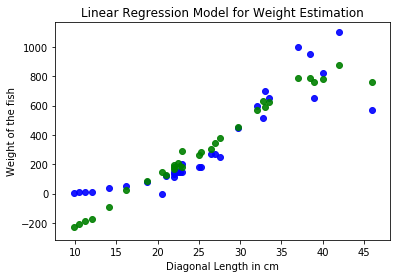

In [64]:
plt.scatter(X_test['LengthDia'], y_test, color='blue', alpha=0.9)
plt.scatter(X_test['LengthDia'], y_pred, color='green', alpha=0.9)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');